In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
import torchvision

from google.colab import drive
from PIL import Image
import os
import sys

drive.mount("/content/gdrive")

# Specify path path of the directory
path = "/content/gdrive/My Drive/Colab Notebooks/PyTorch-AdaIN-StyleTransfer-master"
sys.path.append(path)

from Utils import networks

Mounted at /content/gdrive


In [3]:
# Path for the checkpoint, the vgg state_dict, image folder and device
path_check = os.path.join(path, "StyleTransfer Checkpoint Iter_ 120000.tar")
state_vgg = torch.load(os.path.join(path, "vgg_normalised.pth"), map_location=torch.device("cpu"))

img_dir = "Images"

device = ("cuda" if torch.cuda.is_available() else "cpu")


network = networks.StyleTransferNetwork(device, state_vgg, train=False, load_fromstate=True, load_path=path_check)

In [14]:
transform = transforms.Compose([transforms.Resize(512),
                               #transforms.CenterCrop(256),
                               transforms.ToTensor()])

toPIL = transforms.ToPILImage(mode="RGB")

# Path to images
style_path, content_path = os.path.join(path, img_dir, "style2_small.jpg"), os.path.join(path, img_dir, "NewYork_small.jpg")

# Load image, convert to RGB, transform, add 0 dimension and move to device
style = transform(Image.open(style_path).convert("RGB")).unsqueeze(0).to(device)
content = transform(Image.open(content_path).convert("RGB")).unsqueeze(0).to(device)

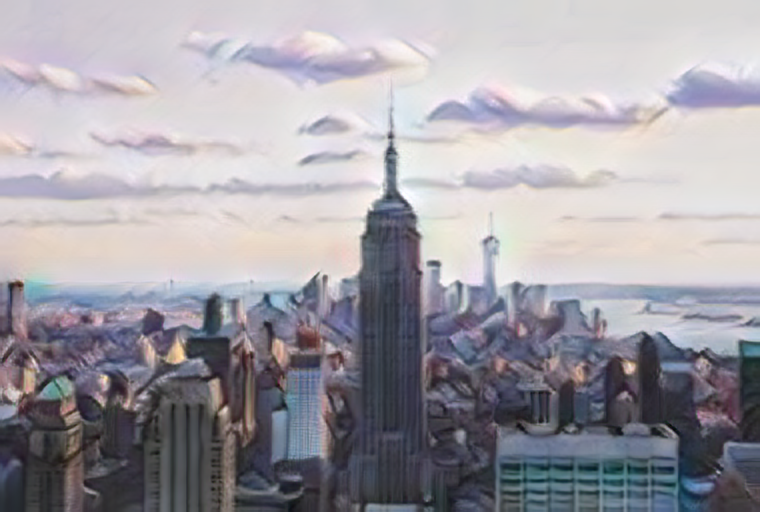

In [15]:
# generate image
alpha = 1.0
out = network(style, content, alpha).cpu()
# convert to grid/image
out = torchvision.utils.make_grid(out.clamp(min=-1, max=1), nrow=3, scale_each=True, normalize=True)
# Make Pil
img = toPIL(out)
img

In [16]:
# Save Image
name = "Out.jpg"
save_image(out, os.path.join(path, img_dir, name))